In [32]:
import pandas as pd
import matplotlib.pyplot as plt

excel_file = 'Results.xlsx' 
df = pd.read_excel(excel_file)
df

,Model,Parameters (B),Model Size (GB),Inference Time (s),Inference Memory (MiB),Winogrande (Accuracy %),Arc_challenge (Accuracy %)
0,gemma-2b,2.51,4.98,7.809,1840.84,0.64400,0.4565
1,float16 Precision,2.51,4.98,7.919,1864.18,0.64330,0.4565
2,4bit Quantization,1.55,2.16,8.234,1901.34,0.64090,0.4019
3,8bit Quantization,2.51,3.03,26.023,2062.42,0.50590,0.2201
4,Flash Attention 2,1.57,2.07,10.975,1813.21,0.63690,0.4249
5,QLora,1.55,3.14,13.024,3340.33,0.49009,0.2201


In [33]:
df.columns[1:]

Index(['Parameters (B)', 'Model Size (GB)', 'Inference Time (s)',
       'Inference Memory (MiB)', 'Winogrande (Accuracy %)',
       'Arc_challenge (Accuracy %)'],
      dtype='object')

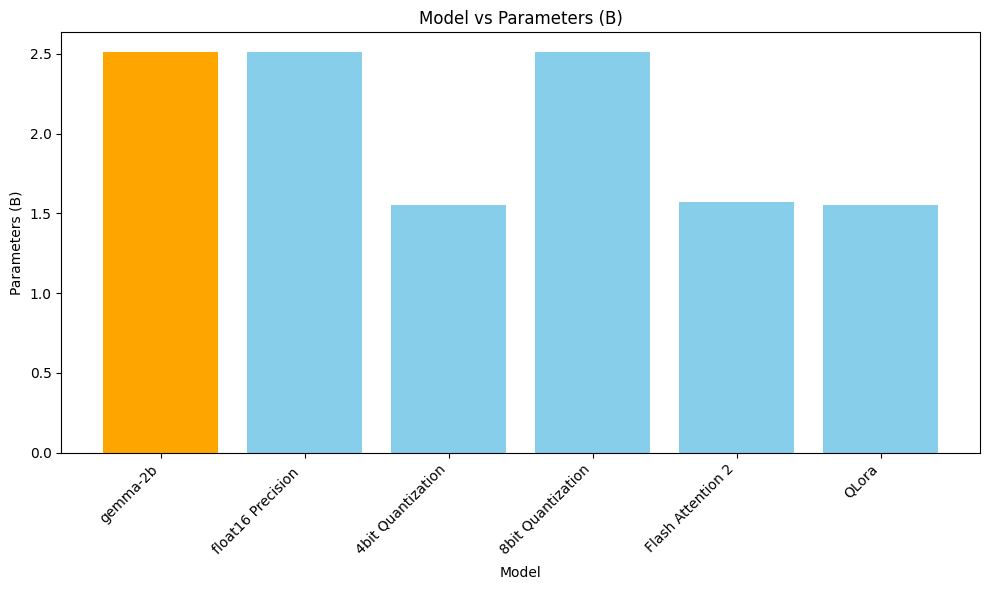

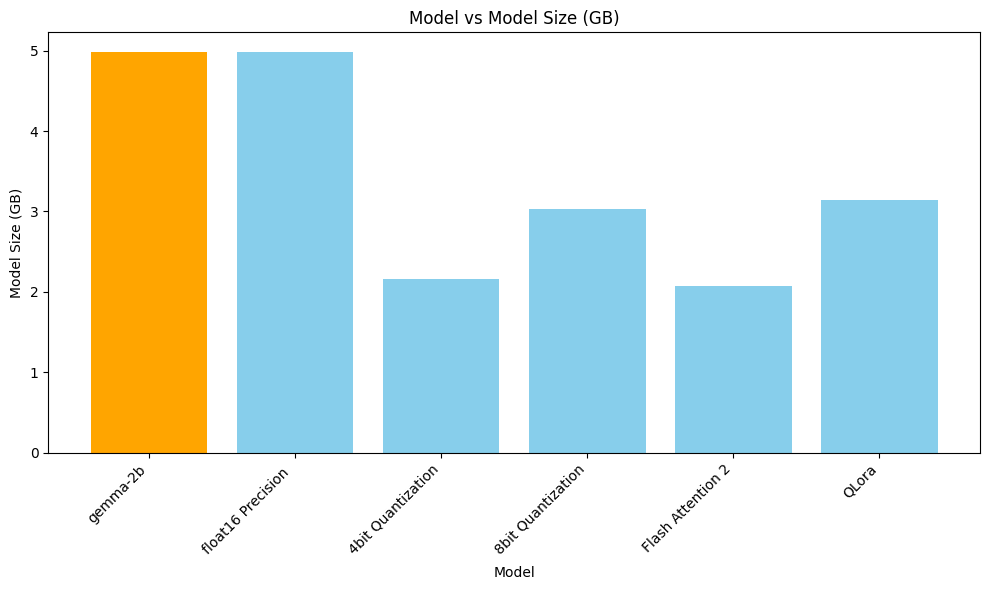

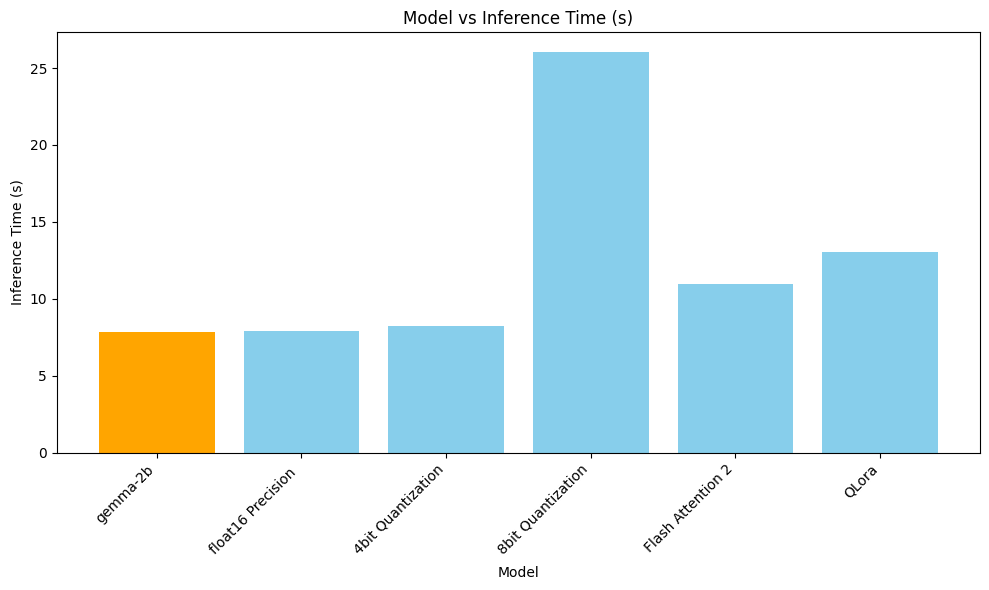

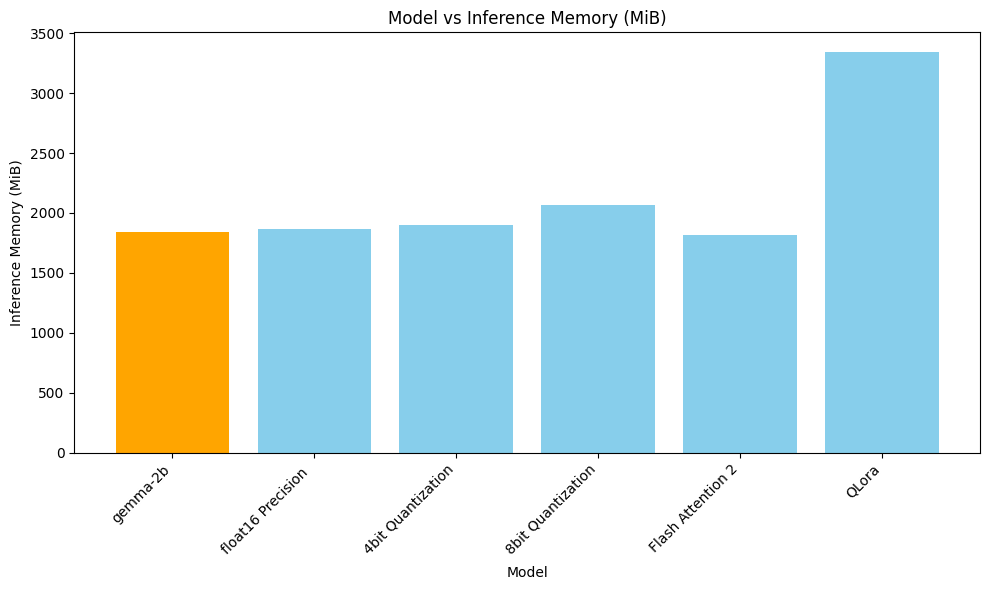

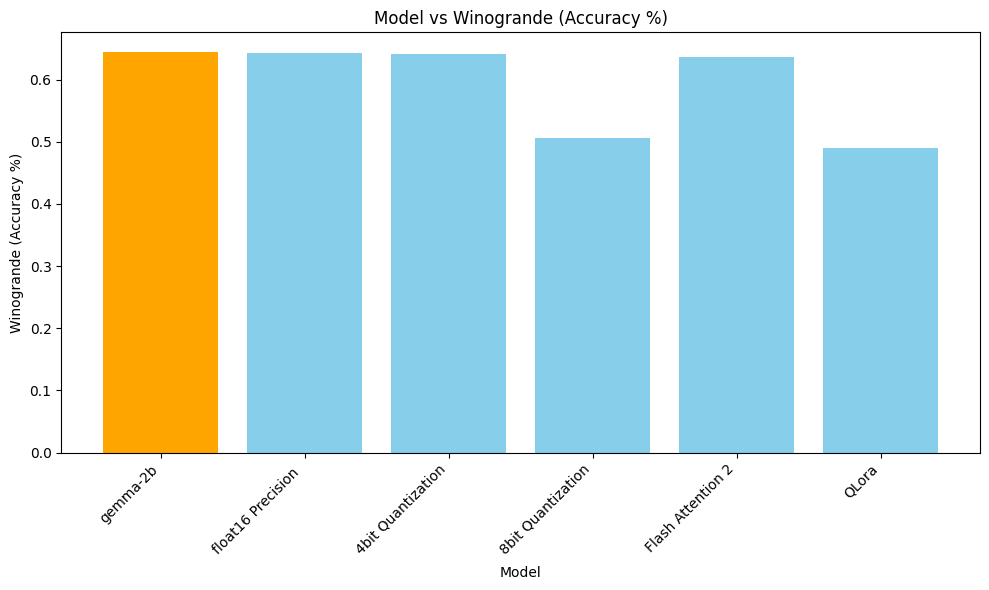

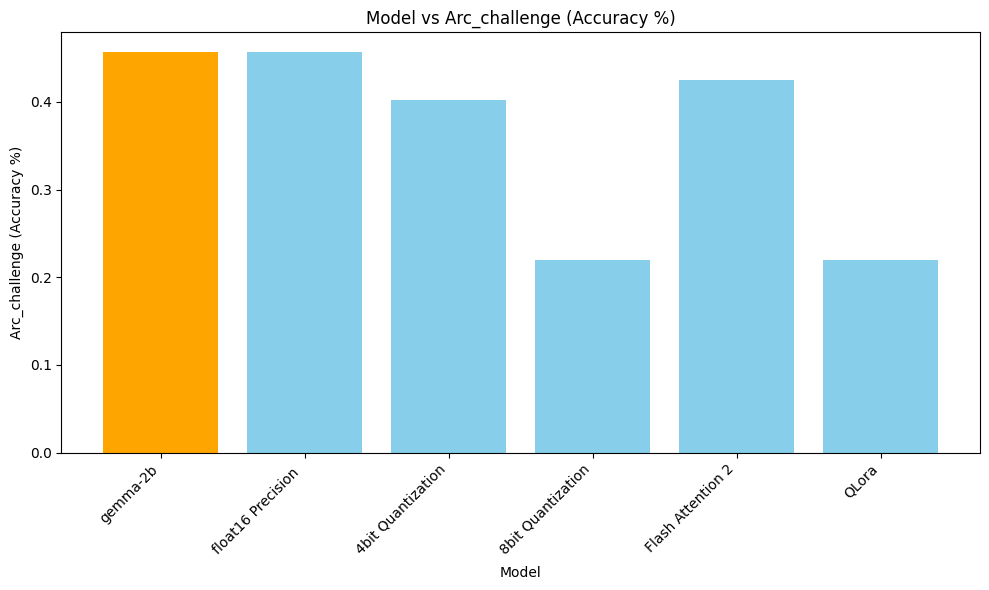

In [34]:
cols = df.columns[1:]

for i,v in enumerate(cols):
    plt.figure(figsize=(10, 6))
    colors = ['orange' if i == 0 else 'skyblue' for i in range(len(df))]
    plt.bar(df['Model'], df[v], color=colors)
    plt.xlabel('Model')
    plt.ylabel(v)
    plt.title('Model vs ' + str(v))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

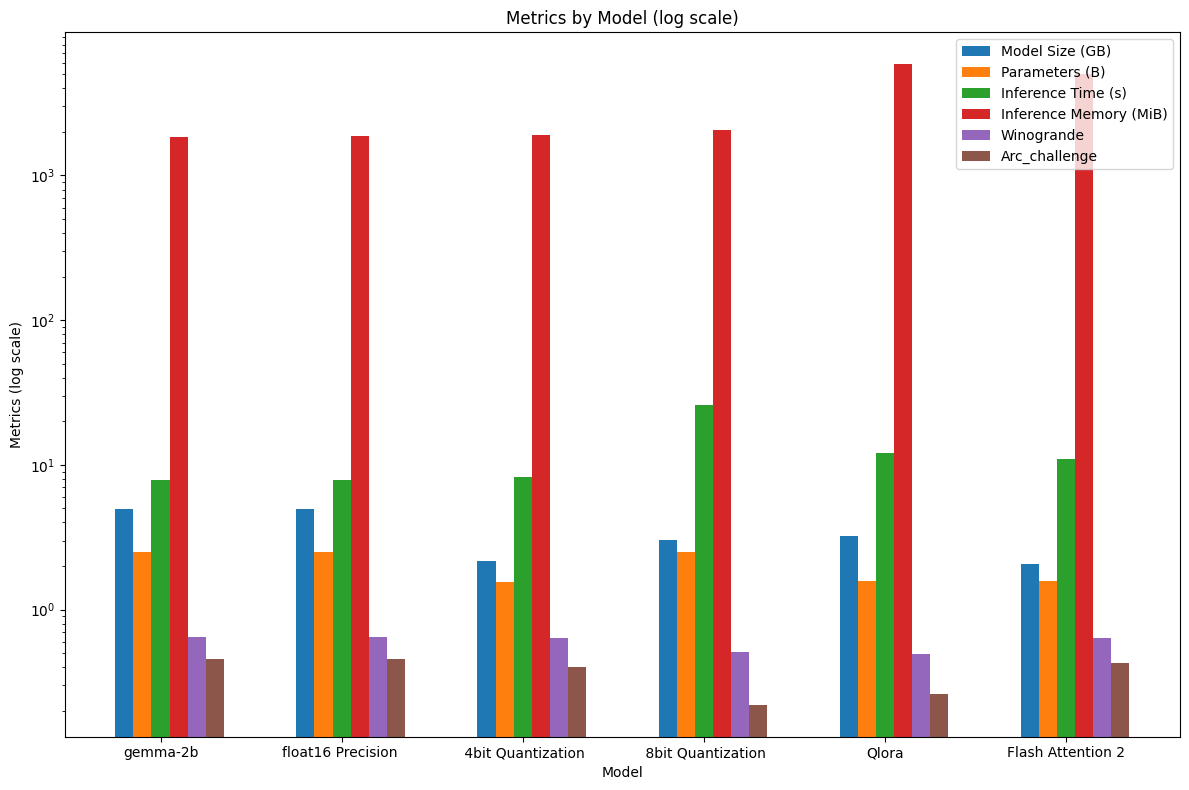

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

excel_file = 'Results.xlsx'  
df = pd.read_excel(excel_file)

models = df['Model'].unique()
parameters = df['Parameters (B)']
model_size = df['Model Size (GB)']
inference_time = df['Inference Time (s)']
inference_memory = df['Inference Memory (MiB)']
winogrande = df['Winogrande']
arc_challenge = df['Arc_challenge']

x = range(len(models))
width = 0.1  

plt.figure(figsize=(12, 8))

plt.bar(x, model_size, width, label='Model Size (GB)')
plt.bar([i + width for i in x], parameters, width, label='Parameters (B)')
plt.bar([i + 2*width for i in x], inference_time, width, label='Inference Time (s)')
plt.bar([i + 3*width for i in x], inference_memory, width, label='Inference Memory (MiB)')
plt.bar([i + 4*width for i in x], winogrande, width, label='Winogrande')
plt.bar([i + 5*width for i in x], arc_challenge, width, label='Arc_challenge')

plt.yscale('log')  # Set y-axis to logarithmic scale

plt.xlabel('Model')
plt.ylabel('Metrics (log scale)')
plt.title('Metrics by Model (log scale)')
plt.xticks([i + 2 * width for i in x], models)
plt.legend()

plt.tight_layout()
plt.savefig('metrics_plot.png')  
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

excel_file = 'Results2.xlsx' 
df = pd.read_excel(excel_file)
df

,Model,Parameters (B),Model Size (GB),Inference Time (s),Inference Memory (MiB),Winogrande,Arc_challenge
0,4,1.55,3.14,13.024,3340.33,0.49009,0.2201
1,16,1.57,3.20,12.007,5862.96,0.49490,0.2202
2,32,1.59,3.28,12.291,6871.00,0.49490,0.2201
3,64,1.62,3.43,12.346,3766.02,0.49490,0.2201
4,128,1.70,3.75,12.446,3720.79,0.49490,0.2602


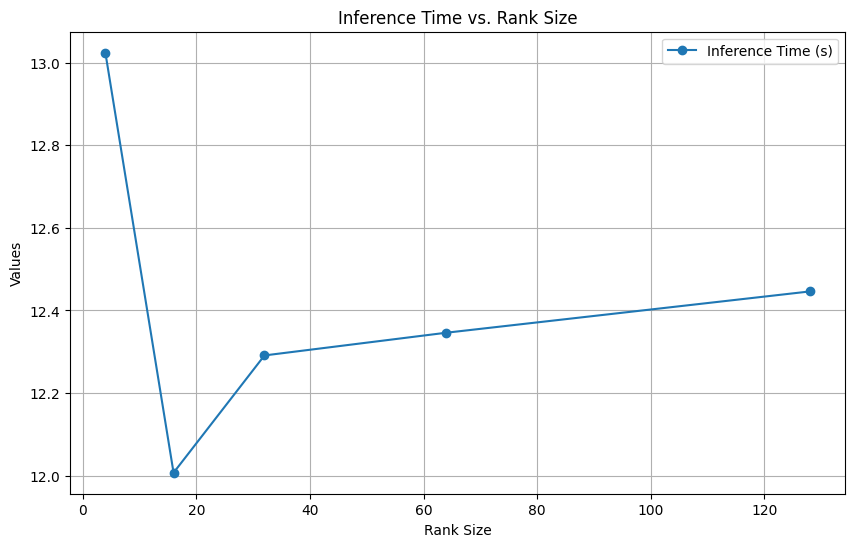

In [10]:
plt.figure(figsize=(10, 6))

plt.plot(df['Model'], df['Inference Time (s)'], marker='o', label='Inference Time (s)')

plt.xlabel('Rank Size')
plt.ylabel('Values')
plt.title('Inference Time vs. Rank Size')
plt.legend()
plt.grid(True)
plt.show()

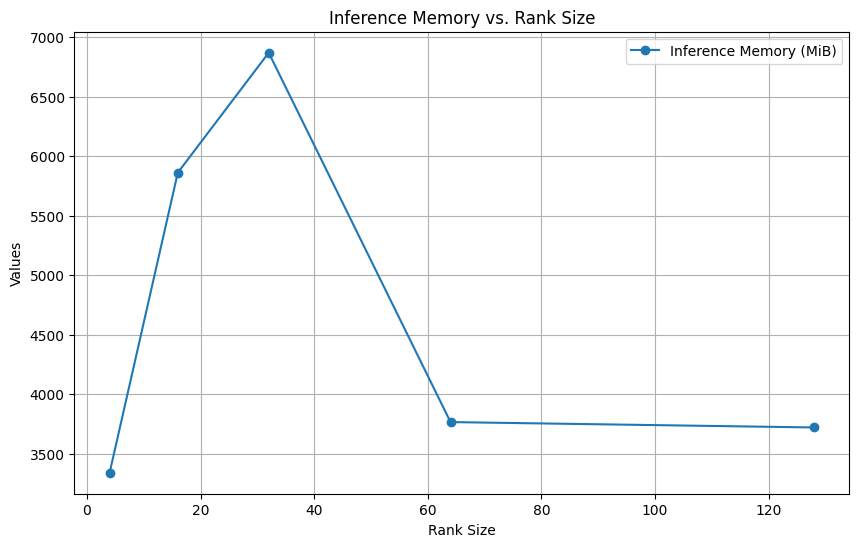

In [11]:
plt.figure(figsize=(10, 6))

plt.plot(df['Model'], df['Inference Memory (MiB)'], marker='o', label='Inference Memory (MiB)')

plt.xlabel('Rank Size')
plt.ylabel('Values')
plt.title('Inference Memory vs. Rank Size')
plt.legend()
plt.grid(True)
plt.show()

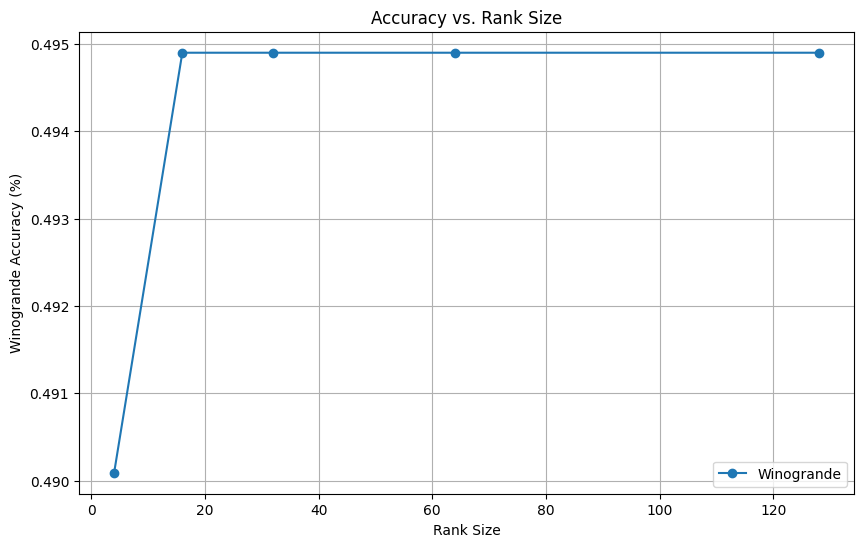

In [12]:
plt.figure(figsize=(10, 6))

plt.plot(df['Model'], df['Winogrande'], marker='o', label='Winogrande')

plt.xlabel('Rank Size')
plt.ylabel('Winogrande Accuracy (%)')
plt.title('Accuracy vs. Rank Size')
plt.legend()
plt.grid(True)
plt.show()

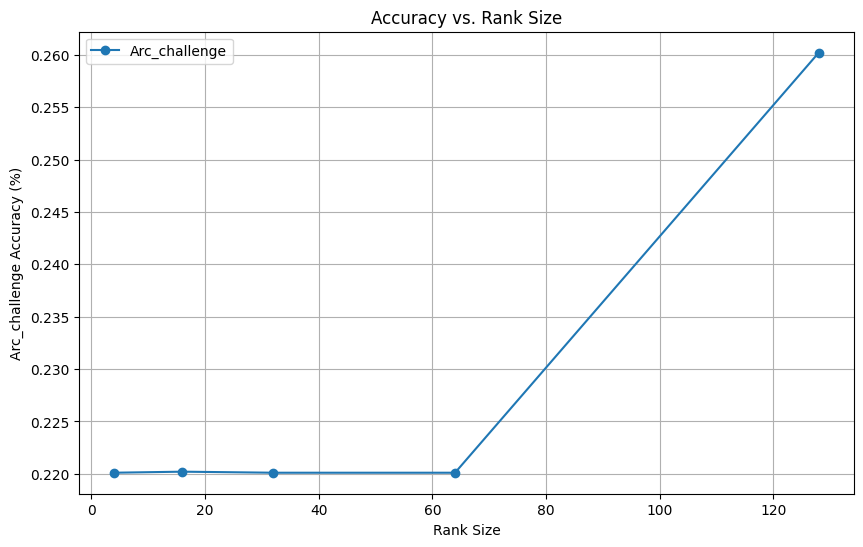

In [13]:
plt.figure(figsize=(10, 6))

plt.plot(df['Model'], df['Arc_challenge'], marker='o', label='Arc_challenge')

plt.xlabel('Rank Size')
plt.ylabel('Arc_challenge Accuracy (%)')
plt.title('Accuracy vs. Rank Size')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

excel_file = 'Rerun.xlsx' 
df = pd.read_excel(excel_file)
df

,Model,CPU total time (ms),Cuda total time (s),CPU inference time (ms),CUDA inference time (ms),CPU Mem (B),CUDA Mem (Mb)
0,4bit Quantization,947.684,242.888,947.673,135.213,840,1390.00
1,8bit Quantization,3990.000,897.716,3990.000,897.703,992,125.41
2,gemma2b,640.668,497.867,640.659,543.180,1000,164.52
3,gemma float16,654.741,498.379,654.733,543.738,784,165.19
4,flash-attention2,1163.000,368.291,1163.000,234.457,984,1440.00
5,lora r4,890.050,224.668,890.038,116.342,758,1270.00
6,lora r32,906.927,231.358,906.916,117.414,900,1270.00
7,lora r64,913.128,264.502,913.115,126.849,958,1270.00
8,lora r128,878.375,230.001,878.363,117.491,828,1280.00


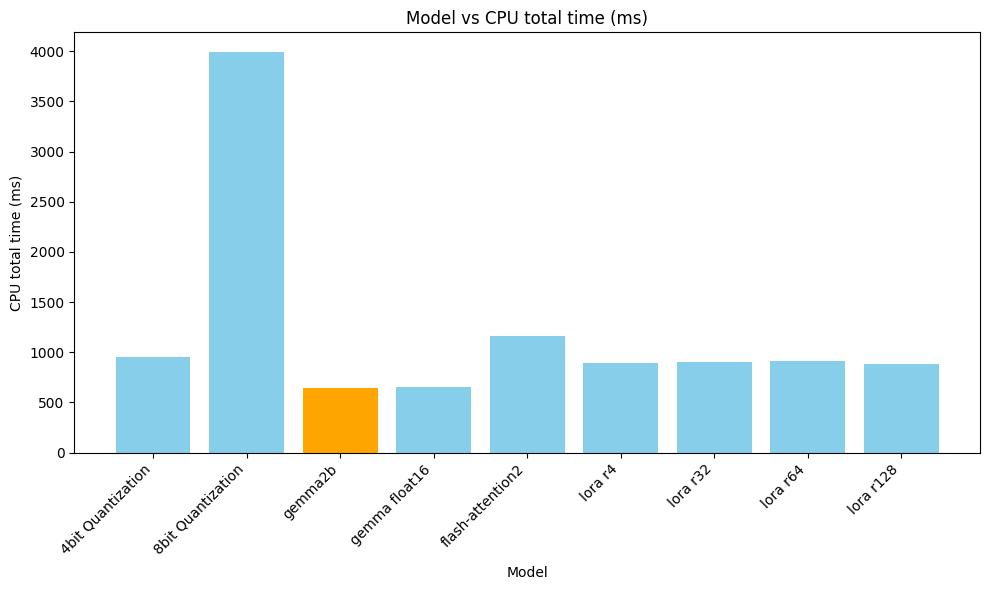

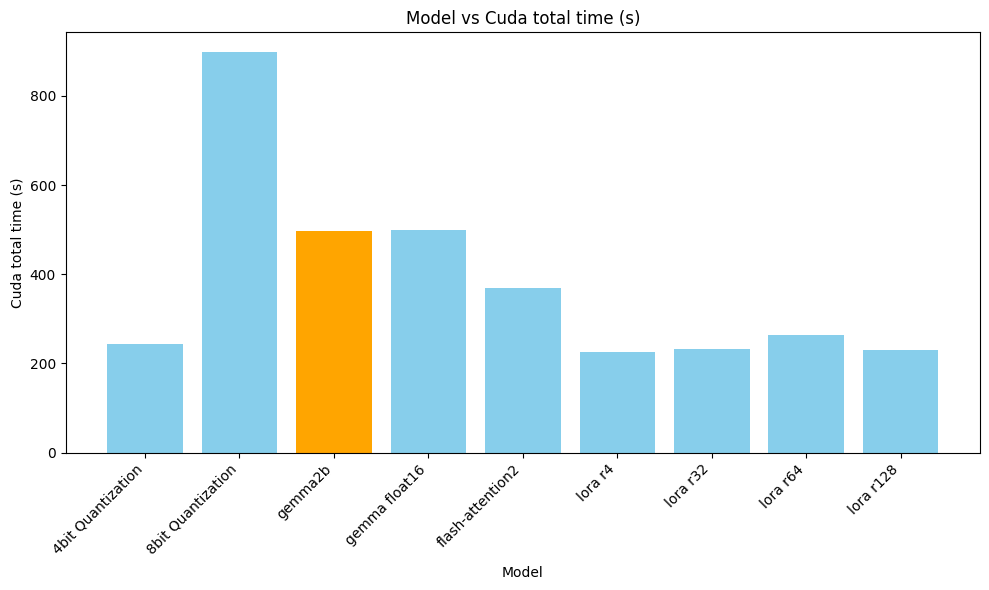

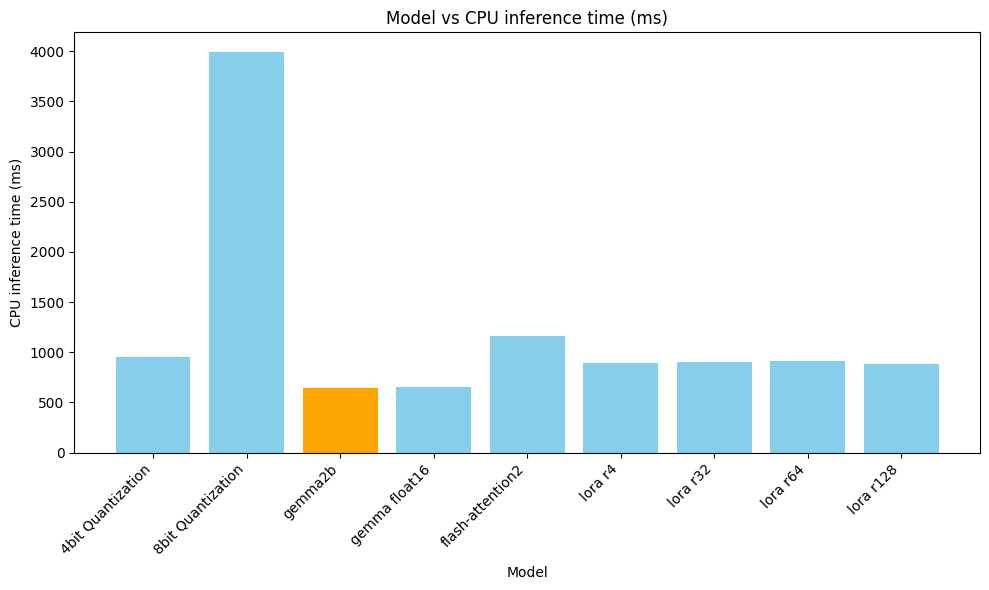

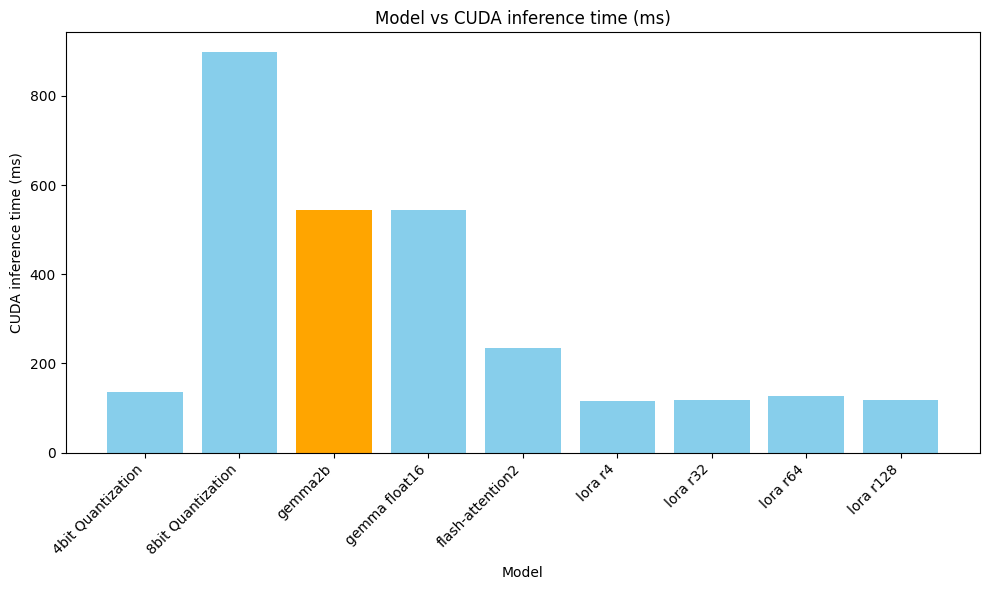

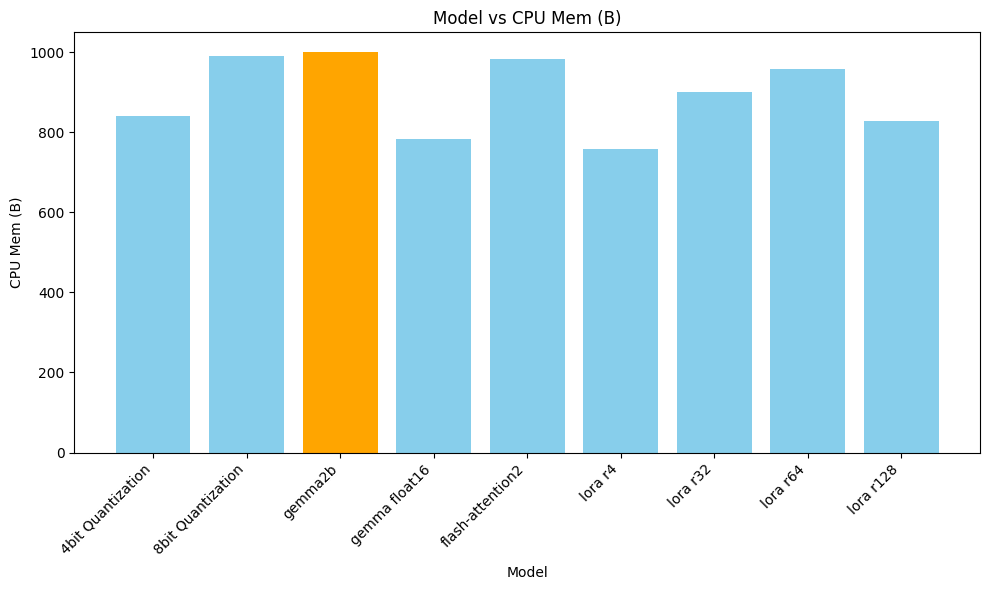

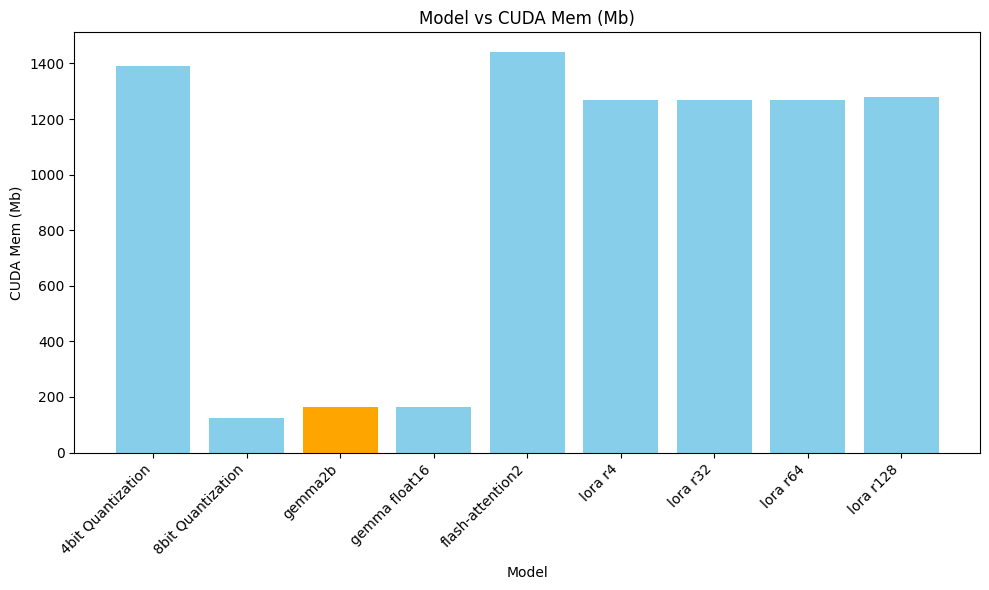

In [26]:
cols = df.columns[1:]

for i,v in enumerate(cols):
    plt.figure(figsize=(10, 6))
    colors = ['orange' if i == 2 else 'skyblue' for i in range(len(df))]
    plt.bar(df['Model'], df[v], color=colors)
    plt.xlabel('Model')
    plt.ylabel(v)
    plt.title('Model vs ' + str(v))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()